In [1]:
import numpy as np
import grape as utils
from scipy.linalg import expm
import matplotlib.pyplot as plt
import copy
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [2]:
nions=1
crosstalk=1/300
nsegments = 5
del_t = 11e-6 
tau = nsegments * del_t        
max_amp = 2 * np.pi * 25e3  
rfi = np.asarray([[1,1]]) 
# rfi = np.asarray([[0.99,0.25], [1,0.5],[1.01,0.25]])    
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,crosstalk)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2) 

In [ ]:
x0 = np.random.rand(nsegments*3);
print(utils.calc_fidelity_t(x0, nsegments, rfi, ssx, ssy, utarg, nions, max_amp))
bnd = Bounds(lb=-np.ones(nsegments*3),ub=np.ones(nsegments*3))
result = minimize(utils.calc_fidelity_t,
         x0=x0, 
         args = (nsegments, rfi, ssx, ssy, utarg, nions, max_amp),
         method='Nelder-Mead',
         options={'disp':True, 'maxfev':6000*20, 'xatol':1e-7, 'fatol':1e-7},
         bounds=bnd,
        )
result

In [9]:
x0 = np.random.rand(nsegments*2);
# x0 = np.asarray([-0.36674613,  0.86673907, -0.99961336, -0.55134774,  1.        ,
#         1.        ,  1.        , -0.01835364, -1.        , -1.        ]) 
print(utils.calc_fidelity6(x0, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp))
bnd = Bounds(lb=-np.ones(nsegments*2),ub=np.ones(nsegments*2))
result = minimize(utils.calc_fidelity6,
         x0=x0, 
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
         method='Nelder-Mead',
         options={'disp':True, 'maxfev':6000*20, 'xatol':1e-6, 'fatol':1e-6},
         bounds=bnd,
        )
result

[0.13914506 0.40421288 0.71977483 0.67457583 0.32022442 0.05106017
 0.04205971 0.53610445 0.09159977 0.2668256 ]
0.03902673821110092
112.00806208257353
[0.13914506 0.40421288 0.71977483 0.67457583 0.32022442 0.05106017
 0.04205971 0.53610445 0.09159977 0.2668256 ]
0.03902673821110092
[0.14610231 0.40421288 0.71977483 0.67457583 0.32022442 0.05106017
 0.04205971 0.53610445 0.09159977 0.2668256 ]
0.03922892594099281
[0.13914506 0.42442352 0.71977483 0.67457583 0.32022442 0.05106017
 0.04205971 0.53610445 0.09159977 0.2668256 ]
0.03961580958389277
[0.13914506 0.40421288 0.75576357 0.67457583 0.32022442 0.05106017
 0.04205971 0.53610445 0.09159977 0.2668256 ]
0.040079336048881586
[0.13914506 0.40421288 0.71977483 0.70830462 0.32022442 0.05106017
 0.04205971 0.53610445 0.09159977 0.2668256 ]
0.04001274716225467
[0.13914506 0.40421288 0.71977483 0.67457583 0.33623564 0.05106017
 0.04205971 0.53610445 0.09159977 0.2668256 ]
0.039492978693989045
[0.13914506 0.40421288 0.71977483 0.67457583 0.3

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.012208760506116079
             x: [ 5.674e-03  3.798e-01  8.539e-01  1.118e-01  6.298e-02
                  2.578e-02 -3.476e-02  1.017e-02  1.909e-02 -1.926e-02]
           nit: 1616
          nfev: 2391
 final_simplex: (array([[ 5.674e-03,  3.798e-01, ...,  1.909e-02,
                        -1.926e-02],
                       [ 5.674e-03,  3.798e-01, ...,  1.909e-02,
                        -1.926e-02],
                       ...,
                       [ 5.674e-03,  3.798e-01, ...,  1.909e-02,
                        -1.926e-02],
                       [ 5.674e-03,  3.798e-01, ...,  1.909e-02,
                        -1.926e-02]]), array([ 1.221e-02,  1.221e-02,  1.221e-02,  1.221e-02,
                        1.221e-02,  1.221e-02,  1.221e-02,  1.221e-02,
                        1.221e-02,  1.221e-02,  1.221e-02]))

In [21]:
result.x

array([-0.37615514, -0.99627862,  1.        ,  0.42790015,  0.99999995,
        0.99997984, -1.        ,  0.40047265, -0.42161528, -0.412335  ])

In [ ]:
np.linspace(0,1/300,5)
# 0.00333333
# newx

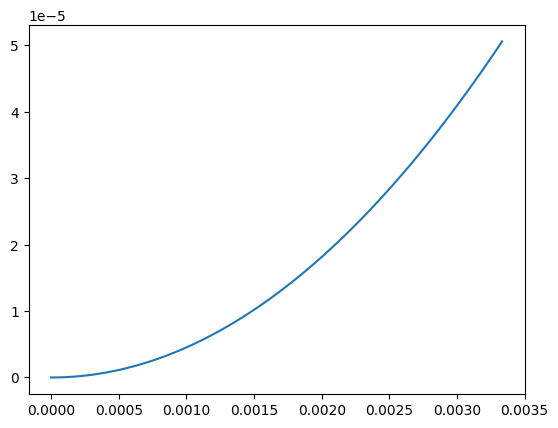

In [18]:
# newx = copy.deepcopy(result.x)
newx = np.asarray([-0.36674613,  0.86673907, -0.99961336, -0.55134774,  1.        ,
        1.        ,  1.        , -0.01835364, -1.        , -1.        ]) # for no rfi, 5, 11e-6, fun 2.5964316363591422e-05
# newx = np.asarray([ 9.95117308e-01, -7.22430209e-01,  5.00766891e-01, -7.24044819e-01,
        # 9.99088574e-01,  1.00000000e+00,  1.00000000e+00, -7.65599323e-04,
    #    -1.00000000e+00, -1.00000000e+00]) # for rfi 5/10e-6
ross = np.linspace(0,1/300,100)
infid = []
for r in ross:
    infid.append(utils.calc_fidelity5(newx * r,nsegments, np.asarray([[1,1]]) , ssx, ssy, np.eye(2), del_t, nions, max_amp))
    
plt.plot(ross,infid)


In [19]:
# newx = copy.deepcopy(result.x)
# newx = np.asarray([-0.36674613,  0.86673907, -0.99961336, -0.55134774,  1.        ,
#         1.        ,  1.        , -0.01835364, -1.        , -1.        ]) # for no rfi, 5, 11e-6, fun 2.5964316363591422e-05
utils.calc_fidelity5(newx ,nsegments, np.asarray([[1,1]]) , ssx, ssy, utarg, del_t, nions, max_amp)


320.322867798899

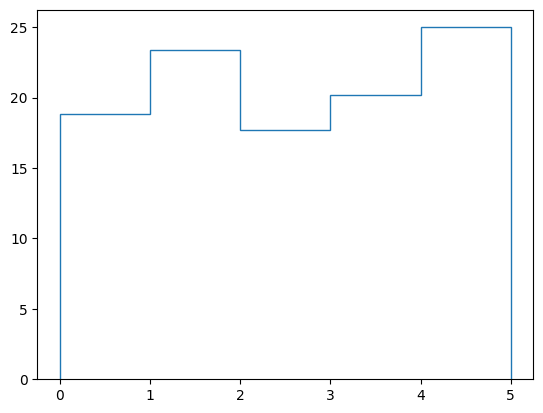

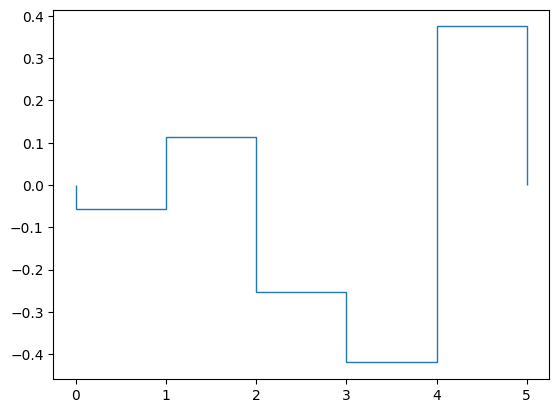

In [5]:
# u=result.x
u = newx
ux = u[0:nsegments] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
uy = u[nsegments:] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
plt.stairs(np.sqrt(ux**2+uy**2))
plt.figure()
plt.stairs(np.arctan2(ux,uy)/2/np.pi)


In [ ]:
nions=3
crosstalk=1/300
nsegments = 9 
del_t = 10e-6 
tau = nsegments * del_t        
max_amp = 2 * np.pi * 25e3              
R = 2                            
div_to_penalize_in_per = 30   
penalty_weight  = 0.5e-10

infidpptt = 1
targ_fid  = 1-infidpptt*1e-4               
rfi = np.asarray([[1,1]]) 
# rfi = np.asarray([[0.99,0.25], [1,0.5],[1.01,0.25]])

In [ ]:
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,crosstalk)
utarg = expm(-1j * (np.pi / 2) * sx[0] / 2) 

# H0=np.zeros((2**nion,2**nion),dtype=complex)
# for j in range(nion):
#     H0 = H0 + 0 * 2 * np.pi * sz[j] / 2

H0 = np.zeros((2**nions,2**nions),dtype=complex)
U0 = np.diag(expm(H0))

W1 = Had;
W2 = Had;

divn = int(np.floor(nsegments*(div_to_penalize_in_per/100)))
x = np.linspace(-2 * np.pi , 2 * np.pi, divn * 2); 
pcurve = (1 - np.cosh(x)/max(np.cosh(x))).tolist()
penalty_range = max_amp * np.asarray(pcurve[0:divn] + (np.ones((nsegments- 2* divn ,))).tolist() + pcurve[divn:])


In [ ]:
x0 = np.random.rand(nsegments*2);
print(utils.calc_fidelity5(x0, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp))
bnd = Bounds(lb=-np.ones(nsegments*2),ub=np.ones(nsegments*2))
result = minimize(utils.calc_fidelity5,
         x0=x0, 
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
         method='Nelder-Mead',
         options={'disp':True},
         bounds=bnd,
        )
result

In [ ]:
newx = copy.deepcopy(result.x)
infid = []
cross = np.linspace(1/400,1/200,100)
for ind in range(100):
    sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,cross[ind])
    infid.append(utils.calc_fidelity5(newx,nsegments, np.asarray([[1,1]]) , ssx, ssy, utarg, del_t, nions, max_amp))

plt.plot(cross,infid)
np.min(infid)

In [ ]:
x0 = np.random.rand(3);
print(utils.calc_fidelity4(x0, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp))
bnd = Bounds(lb=np.zeros(3),ub=np.ones(3))
result = minimize(utils.calc_fidelity4,
         x0=x0, 
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
         method='Nelder-Mead',
         options={'disp':True, 'adaptive':True},
         bounds=bnd,
        )
result.x

In [ ]:
x0 = np.random.rand(2*4); print(x0)
print(x0[0:4])
print(x0[4:])

In [ ]:
newx = copy.deepcopy(result.x)
infid = []
cross = np.linspace(1/400,1/200,100)
for ind in range(100):
    sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,cross[ind])
    infid.append(utils.calc_fidelity4(newx,nsegments, np.asarray([[1,1]]) , ssx, ssy, utarg, del_t, nions, max_amp))

plt.plot(cross,infid)
np.min(infid)

In [ ]:
x0 = np.random.rand(2);
u0 = utils.get_gaussian_pulse( x0 , del_t, nsegments, max_amp)
plt.stairs(u0/2/np.pi/1e3)
print(utils.calc_fidelity3(x0, nsegments, rfi, ssx, utarg, del_t, nions, max_amp))
bnd = Bounds(lb=np.ones(2)*1e-10,ub=np.ones(2))
result = minimize(utils.calc_fidelity3,
         x0=x0, 
         args = (nsegments, rfi, ssx, utarg, del_t, nions, max_amp),
         method='Nelder-Mead',
         options={'disp':True},
         bounds=bnd,
        )
result.x
# np.min(u0/2/np.pi/1e3)

In [ ]:
plt.stairs([ amp/2/np.pi/1e3 for amp in u0], label = 'start')
plt.stairs([ amp/2/np.pi/1e3 for amp in utils.get_gaussian_pulse(result.x , del_t, nsegments, max_amp)])
plt.legend()

In [ ]:
dev = 5
a=-dev
b=dev

newu = copy.deepcopy(utils.get_gaussian_pulse(result.x , del_t, nsegments, max_amp))
distor_all = []
infid = []
for j in range(5000):
    distortu = np.zeros(nsegments)
    for k in range(nsegments):
        dev_per = (b - a) * np.random.rand() + a
        distortu[k] = newu[k] * ( 1 + dev_per / 100)
        
    distor_all.append(distortu)
    infid.append(utils.calc_fidelity2(distortu,nsegments, rfi, ssx, utarg, del_t, nions))

In [ ]:
indxmin = np.argmin(infid)
indxmax = np.argmax(infid)
disu_min = distor_all[indxmin]
disu_max = distor_all[indxmax]
plt.stairs([ amp/2/np.pi/1e3 for amp in result.x], label = 'start')
plt.stairs([ amp/2/np.pi/1e3 for amp in disu_min], label = f'min : {infid[indxmin]}')
plt.stairs([ amp/2/np.pi/1e3 for amp in disu_max], label = f'max : {infid[indxmax]}')
plt.legend()

In [ ]:
bn =np.arange(min(infid),max(infid),0.1)
plt.hist(infid, bins = bn, rwidth=0.9 )

In [ ]:
# gaussian vs crosstalk

newu = copy.deepcopy(utils.get_gaussian_pulse(result.x , del_t, nsegments, max_amp))
infid = []
cross = np.linspace(1/400,1/200,100)
for ind in range(100):
    sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,cross[ind])
    infid.append(utils.calc_fidelity2(newu,nsegments, rfi, ssx, utarg, del_t, nions))

plt.plot(cross,infid)
np.min(infid)

In [ ]:
x0 = np.random.rand(3)
u0 = utils.get_supergaussian_pulse( x0 , del_t, nsegments, max_amp)
plt.plot(u0)
fid, _ = utils.calc_fidelity(u0, nsegments, rfi, ssx, W1, W2, utarg, del_t,nions)
print(1-fid)
print(utils.calc_fidelity3(x0,nsegments, rfi, ssx, utarg, del_t, nions, max_amp))
penalty_range = np.ones(3)*max_amp
bnd = Bounds(lb=np.zeros(3),ub=penalty_range)
# bnd = Bounds(lb=np.zeros(nsegments),ub=np.ones(nsegments)*max_amp)
result = minimize(utils.calc_fidelity3,
         x0=x0, 
         args = (nsegments, rfi, ssx, utarg, del_t, nions, max_amp),
         method='Nelder-Mead',
         options={'disp':True},
         bounds=bnd,
        )

In [ ]:
result.x

In [ ]:
plt.stairs([ amp/2/np.pi/1e3 for amp in u0], label = 'start')
plt.stairs([ amp/2/np.pi/1e3 for amp in utils.get_supergaussian_pulse(result.x , del_t, nsegments, max_amp)])
plt.legend()

In [ ]:
xx = np.random.rand(6)
u0 = utils.get_fourier_pulse( xx , del_t, nsegments, max_amp, penalty_range)
fid, _ = utils.calc_fidelity(u0, nsegments, rfi, ssx, W1, W2, utarg, del_t,nions)
print(1-fid)
print(utils.calc_fidelity2(u0,nsegments, rfi, ssx, utarg, del_t, nions))

bnd = Bounds(lb=np.zeros(nsegments),ub=penalty_range)
# bnd = Bounds(lb=np.zeros(nsegments),ub=np.ones(nsegments)*max_amp)
result = minimize(utils.calc_fidelity2,
         x0=u0, 
         args = (nsegments, rfi, ssx, utarg, del_t, nions),
         method='Nelder-Mead',
         options={'disp':True},
         bounds=bnd,
        )

In [ ]:
cross = np.linspace(1/400,1/200,100)

infid = []
for ind in range(100):
    sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,cross[ind])
    rfi_temp = np.asarray([[1,1]])
    fid, _ = utils.calc_fidelity(result.x, nsegments, rfi_temp, ssx, W1, W2, utarg, del_t,nions)
    infid.append((1-fid)*1e4)

plt.plot(cross-1/300,infid)

In [ ]:
dev = 0.05
rr = np.linspace(1-dev,1+dev,100)
infid = []
for ind in range(100):
    rfi_temp = np.asarray([[rr[ind],1]])
    fid, _ = utils.calc_fidelity(result.x, nsegments, rfi_temp, ssx, W1, W2, utarg, del_t,nions)
    infid.append((1-fid)*1e4)

plt.plot(rr,infid)

In [ ]:
plt.stairs([ amp/2/np.pi/1e3 for amp in u0], label = 'start')
plt.stairs([ amp/2/np.pi/1e3 for amp in result.x])
plt.legend()

In [ ]:
penalty_range = np.ones(nsegments)*max_amp
u0 = utils.make_controls(R, nsegments, max_amp, penalty_range)
fid, _ = utils.calc_fidelity(u0, nsegments, rfi, ssx, W1, W2, utarg, del_t,nions)
print(1-fid)
print(utils.calc_fidelity2(u0,nsegments, rfi, ssx, utarg, del_t, nions))

bnd = Bounds(lb=np.zeros(nsegments),ub=penalty_range)
result = minimize(utils.calc_fidelity2,
         x0=u0, 
         args = (nsegments, rfi, ssx, utarg, del_t, nions),
         method='Nelder-Mead',
         options={'disp':True},
         bounds=bnd,
        )

In [ ]:
plt.stairs([ amp/2/np.pi/1e3 for amp in u0], label = 'start')
plt.stairs([ amp/2/np.pi/1e3 for amp in result.x])
plt.legend()

In [ ]:
dev = 5
a=-dev
b=dev

newu = copy.deepcopy(result.x)
distor_all = []
infid = []
for j in range(5000):
    distortu = np.zeros(nsegments)
    for k in range(nsegments):
        dev_per = (b - a) * np.random.rand() + a
        distortu[k] = newu[k] * ( 1 + dev_per / 100)
        
    distor_all.append(distortu)
    infid.append(utils.calc_fidelity2(distortu,nsegments, rfi, ssx, utarg, del_t, nions))

In [ ]:
indxmin = np.argmin(infid)
indxmax = np.argmax(infid)
disu_min = distor_all[indxmin]
disu_max = distor_all[indxmax]
plt.stairs([ amp/2/np.pi/1e3 for amp in result.x], label = 'start')
plt.stairs([ amp/2/np.pi/1e3 for amp in disu_min], label = f'min : {infid[indxmin]}')
plt.stairs([ amp/2/np.pi/1e3 for amp in disu_max], label = f'max : {infid[indxmax]}')
plt.legend()

In [ ]:
bn =np.arange(0,max(infid),0.1)
plt.hist(infid, bins = bn, rwidth=0.9 )

In [150]:
fac2_firs = (b1 - a1) * np.random.rand() + a1
print(fac2_firs/100)

0.001528327184913938


In [156]:
# systematic change
def get_sk1_pulse(amp_ps,phase,t_ps=10e-6,sigmax=ssx,sigmay=ssy):
    ps = expm(-1j * ( 2 * np.pi * amp_ps * t_ps) * (np.cos(phase)*sigmax+np.sin(phase)*sigmay) / 2) 
    return ps

dev_per = np.linspace(0.99,1.01,100)

distor_all = []
distor_all_ps = []
infid = []

for amp_dev in dev_per:
    for phi_dev in dev_per:
        amp_ps = 25e3 * amp_dev
        phase = np.arccos(-1/8) * phi_dev
        # first pulse
        ps0 = get_sk1_pulse(amp_ps,0)
        # next four pulses
        ps1 = get_sk1_pulse(amp_ps,phase)
        ps2 = get_sk1_pulse(amp_ps,phase)
        ps3 = get_sk1_pulse(amp_ps,phase)
        ps4 = get_sk1_pulse(amp_ps,phase)
        # next four pulses
        ps5 = get_sk1_pulse(amp_ps,-phase)
        ps6 = get_sk1_pulse(amp_ps,-phase)
        ps7 = get_sk1_pulse(amp_ps,-phase)
        ps8 = get_sk1_pulse(amp_ps,-phase)

        sk1 = utils.prod(ps8,ps7,ps6,ps5,ps4,ps3,ps2,ps1,ps0)
        
        distor_all.append(amp_ps)
        distor_all_ps.append(phase)
        infid.append((1-abs(np.trace(np.matmul(utils.dagger(utarg),sk1))) / 2**nions)*1e4)
    # infid.append((1-abs(np.trace(np.matmul(np.eye(2),sk1))) / 2**nions)*1e4)

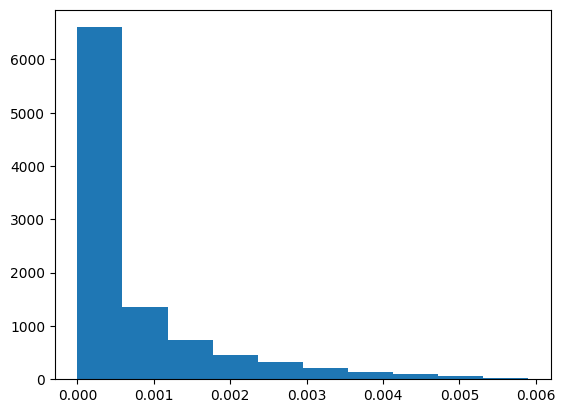

In [159]:
# bn =np.arange(0,max(infid),0.5)
# axs = plt.hist(infid, bins = bn , rwidth=0.9 )
axs = plt.hist(infid)

In [116]:
def get_sk1_pulse(amp_ps,phase,t_ps=10e-6,sigmax=ssx,sigmay=ssy):
    ps = expm(-1j * ( 2 * np.pi * amp_ps * t_ps) * (np.cos(phase)*sigmax+np.sin(phase)*sigmay) / 2) 
    return ps

dev = 1
a = -dev
b = dev

dev1 = 1
a1 = -dev1
b1 = dev1

distor_all = []
distor_all_ps = []
infid = []

for j in range(10000):
    fac  = (b - a) * np.random.rand(9) + a
    amp_ps = 25e3 * (1 + (fac / 100))
    # print(amp_ps)
    fac2_temp = (b1 - a1) * np.random.rand(8) + a1
    fac2_firs = (b1 - a1) * np.random.rand() + a1
    fac2_secd = np.arccos(-1/8) * (1 + (fac2_temp / 100))
    phase = [fac2_firs/100] + fac2_secd.tolist()
    # phase = np.arccos(-1/8) * (1 + (fac2 / 100))
    # first pulse
    ps0 = get_sk1_pulse(amp_ps[0],phase[0])
    # next four pulses
    ps1 = get_sk1_pulse(amp_ps[1],phase[1])
    ps2 = get_sk1_pulse(amp_ps[2],phase[2])
    ps3 = get_sk1_pulse(amp_ps[3],phase[3])
    ps4 = get_sk1_pulse(amp_ps[4],phase[4])
    # next four pulses
    ps5 = get_sk1_pulse(amp_ps[5],-phase[5])
    ps6 = get_sk1_pulse(amp_ps[6],-phase[6])
    ps7 = get_sk1_pulse(amp_ps[7],-phase[7])
    ps8 = get_sk1_pulse(amp_ps[8],-phase[8])

    sk1 = utils.prod(ps8,ps7,ps6,ps5,ps4,ps3,ps2,ps1,ps0)
    
    distor_all.append(amp_ps)
    distor_all_ps.append(phase)
    infid.append((1-abs(np.trace(np.matmul(utils.dagger(utarg),sk1))) / 2**nions)*1e4)
    # infid.append((1-abs(np.trace(np.matmul(np.eye(2),sk1))) / 2**nions)*1e4)
    

(0.0, 17.5)

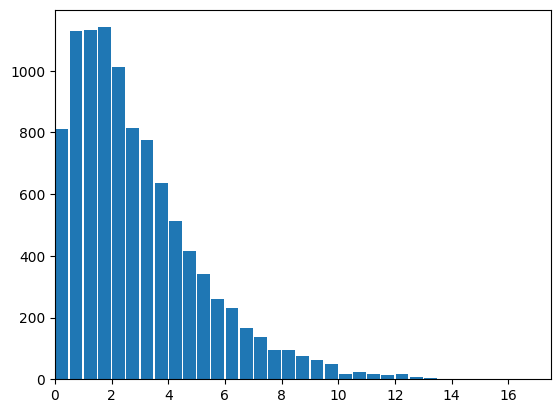

In [155]:
bn =np.arange(0,max(infid),0.5)
axs = plt.hist(infid, bins = bn , rwidth=0.9 )
plt.xlim([0,17.5])

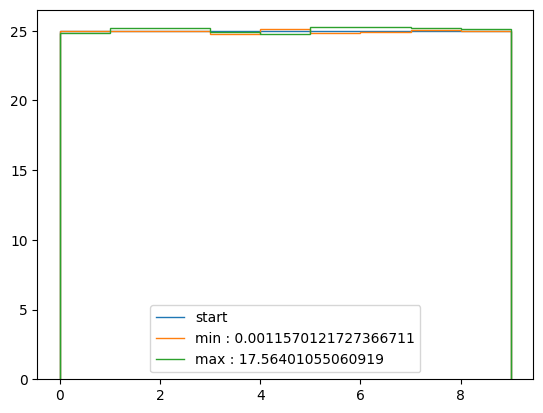

In [118]:
indxmin = np.argmin(infid)
indxmax = np.argmax(infid)
disu_min = distor_all[indxmin]
disu_max = distor_all[indxmax]
plt.stairs([ amp/2/np.pi/1e3 for amp in np.ones(9)*max_amp], label = 'start')
plt.stairs([ amp/1e3 for amp in disu_min], label = f'min : {infid[indxmin]}')
plt.stairs([ amp/1e3 for amp in disu_max], label = f'max : {infid[indxmax]}')
plt.legend()

(-0.52, 0.3)

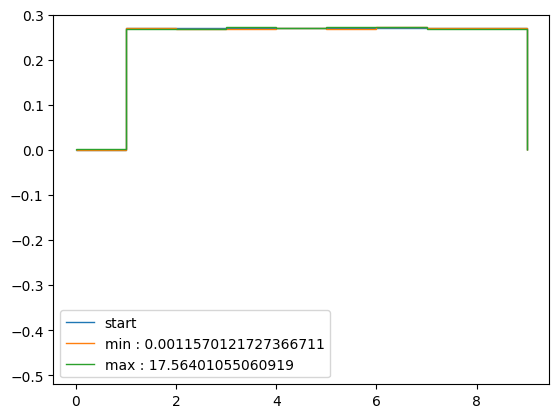

In [153]:
indxmin = np.argmin(infid)
indxmax = np.argmax(infid)
disu_min = np.asarray(distor_all_ps[indxmin])
disu_max = np.asarray(distor_all_ps[indxmax])
disu_min_ps = np.asarray(disu_min.tolist())/2/np.pi
disu_max_ps = np.asarray(disu_max.tolist())/2/np.pi
plt.stairs(np.asarray([0]+ [np.arccos(-1/8)]*8)/2/np.pi, label = 'start')
plt.stairs(disu_min_ps, label = f'min : {infid[indxmin]}')
plt.stairs(disu_max_ps, label = f'max : {infid[indxmax]}')
plt.legend()
plt.ylim([-0.52,0.3])

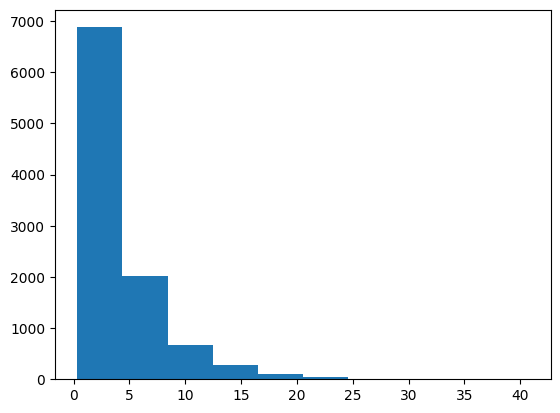

In [57]:
# bn =np.arange(0,max(infid),.1)
# axs = plt.hist(infid, bins = bn , rwidth=0.9 )
ax = plt.hist([val*1e5 for val in infid])

In [31]:
nions=1
crosstalk=1/300
nsegments = 5
del_t = 10e-6 
tau = nsegments * del_t        
max_amp = 2 * np.pi * 25e3  
# rfi = np.asarray([[1,1]]) 
rfi = np.asarray([[0.99,0.25], [1,0.5],[1.01,0.25]])    
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,crosstalk)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2) 

x0 = np.random.rand(nsegments*2);
# x0 = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
#        -1.00000000e+00, -1.00000000e+00])
print(utils.calc_fidelity6(x0, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp))
bnd = Bounds(lb=-np.ones(nsegments*2),ub=np.ones(nsegments*2))
result = minimize(utils.calc_fidelity6,
         x0=x0, 
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
         method='Nelder-Mead',
         options={'disp':True, 'maxfev':6000*20, 'xatol':1e-6, 'fatol':1e-6},
         bounds=bnd,
        )
result

[0.11944757 0.39050128 0.07637171 0.8221062  0.82529511 0.55956519
 0.96934948 0.74061485 0.33568144 0.38676489]
0.09138125781626982
490.6354907000342
[0.11944757 0.39050128 0.07637171 0.8221062  0.82529511 0.55956519
 0.96934948 0.74061485 0.33568144 0.38676489]
0.09138125781626982
[0.12541995 0.39050128 0.07637171 0.8221062  0.82529511 0.55956519
 0.96934948 0.74061485 0.33568144 0.38676489]
0.09155637760827062
[0.11944757 0.41002635 0.07637171 0.8221062  0.82529511 0.55956519
 0.96934948 0.74061485 0.33568144 0.38676489]
0.09195549982798923
[0.11944757 0.39050128 0.0801903  0.8221062  0.82529511 0.55956519
 0.96934948 0.74061485 0.33568144 0.38676489]
0.09149317107715049
[0.11944757 0.39050128 0.07637171 0.86321151 0.82529511 0.55956519
 0.96934948 0.74061485 0.33568144 0.38676489]
0.09259599466515667
[0.11944757 0.39050128 0.07637171 0.8221062  0.86655987 0.55956519
 0.96934948 0.74061485 0.33568144 0.38676489]
0.09260074965489196
[0.11944757 0.39050128 0.07637171 0.8221062  0.8252

KeyboardInterrupt: 

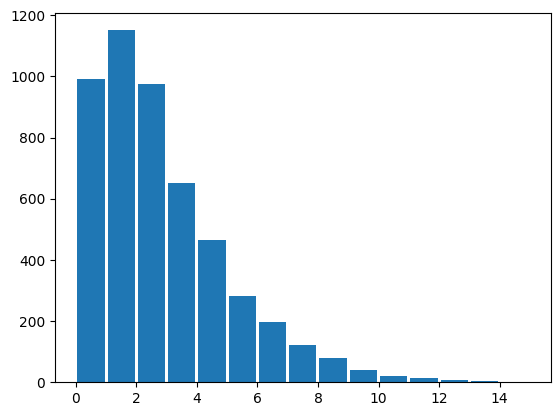

In [18]:
bn =np.arange(0,max(infid),1)
axs = plt.hist(infid, bins = bn , rwidth=0.9 )

In [ ]:
# sk1 vs crosstalk
def get_sk1_pulse(amp_ps,phase,t_ps=10e-6,sigmax=ssx,sigmay=ssy):
    ps = expm(-1j * ( 2 * np.pi * amp_ps * t_ps) * (np.cos(phase)*sigmax+np.sin(phase)*sigmay) / 2) 
    return ps

# cross = np.linspace(1/400,1/200,100)

nions = 3
infid = []
cross = np.linspace(1/400,1/200,100)
# cross = np.asarray([1/30])
for ind in range(100):
    
    sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,cross[ind])
    utarg = expm(-1j * (np.pi / 2) * sx[0] / 2) 
    amp_ps = 25e3 * np.ones(9)
    # print(amp_ps)
    phase = np.arccos(-1/8)
    # first pulse
    ps0 = get_sk1_pulse(amp_ps[0],0,sigmax=ssx,sigmay=ssy)
    # next four pulses
    ps1 = get_sk1_pulse(amp_ps[1],phase,sigmax=ssx,sigmay=ssy)
    ps2 = get_sk1_pulse(amp_ps[2],phase,sigmax=ssx,sigmay=ssy)
    ps3 = get_sk1_pulse(amp_ps[3],phase,sigmax=ssx,sigmay=ssy)
    ps4 = get_sk1_pulse(amp_ps[4],phase,sigmax=ssx,sigmay=ssy)
    # next four pulses
    ps5 = get_sk1_pulse(amp_ps[5],-phase,sigmax=ssx,sigmay=ssy)
    ps6 = get_sk1_pulse(amp_ps[6],-phase,sigmax=ssx,sigmay=ssy)
    ps7 = get_sk1_pulse(amp_ps[7],-phase,sigmax=ssx,sigmay=ssy)
    ps8 = get_sk1_pulse(amp_ps[8],-phase,sigmax=ssx,sigmay=ssy)

    sk1 = utils.prod(ps8,ps7,ps6,ps5,ps4,ps3,ps2,ps1,ps0)
    # print(abs(np.trace(np.matmul(utils.dagger(utarg),sk1))) / 2**nions)
    infid.append((1-abs(np.trace(np.matmul(utils.dagger(utarg),sk1))) / 2**nions)*1e4)

plt.plot(cross,infid)
# infid

In [ ]:
# rabi vs crosstalk

infid = []
cross = np.linspace(1/400,1/200,100)
# cross = np.asarray([1/300])
for ind in range(100):
    
    sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,cross[ind])
     
    amp_ps = 25e3
    ps = expm(-1.0j *  2 * np.pi * amp_ps * 10e-6 *ssx / 2)
    
    infid.append((1-abs(np.trace(np.matmul(utils.dagger(utarg),ps))) / 2**nions)*1e4)

plt.plot(cross,infid)
np.min(infid)

In [ ]:
plt.stairs([ amp/2/np.pi/1e3 for amp in result.x])

In [ ]:
a = np.random.rand(10)
print(a)
result = np.asarray([a[i + 1] - a[i] for i in range(9)])
print(result)

In [ ]:
sum(np.heaviside(result,0))

In [ ]:
stepsize = 5e+10    
u = utils.make_controls(R, nsegments, max_amp, penalty_range)
gr_penal, fid_penal = utils.penalty(u, penalty_range)
fid, uf = utils.calc_fidelity(u, nsegments, rfi, ssx, W1, W2, utarg, del_t,nions)
fid = fid - penalty_weight * fid_penal
iteration = 0 
print(f"iteration : {iteration}, infid : {(1-fid)*1e4}")

print(f"starting main loop ...")
old_gr = np.zeros(nsegments)
old_dirc = np.zeros(nsegments)
resetflag=0

while fid < targ_fid:
    iteration += 1
    gr = utils.calc_grad(uf, nions, rfi, nsegments, utarg, gr_penal, penalty_weight, ssx, del_t)
    good_dirc, multifac = utils.conjugate_grad(resetflag, iteration, gr, old_gr, old_dirc, fid, stepsize, nions, nsegments, 
                         rfi, ssx, W1, W2, utarg, u, del_t, penalty_weight, penalty_range)
    
    old_gr = copy.deepcopy(gr)
    old_stepsize = copy.deepcopy(stepsize)
    old_u = copy.deepcopy(u)
    old_dirc = copy.deepcopy(good_dirc)
    old_fid = copy.deepcopy(fid)
    
    u = u + multifac* stepsize * good_dirc
    stepsize = np.sqrt(multifac) * stepsize
    fid, uf = utils.calc_fidelity(u, nsegments, rfi, ssx, W1, W2, utarg, del_t,nions)
    gr_penal, fid_penal = utils.penalty(u, penalty_range)
    fid = fid - penalty_weight * fid_penal
    print(f"iteration : {iteration}, infid : {(1-fid)*1e4}")
    # infid = (1 - fid) * 1e4
    
    # We screwed up, either stepsize was wrong or conjugate gradients were wrong,
    if fid < old_fid:
        print('Resetting CG ..')
        resetflag = 1
        good_dirc, multifac = utils.conjugate_grad(resetflag, iteration, gr, old_gr, old_dirc, old_fid, old_stepsize, nions, nsegments, 
                         rfi, ssx, W1, W2, utarg, u, del_t, penalty_weight, penalty_range)
        
        u = old_u + multifac * old_stepsize * good_dirc
        stepsize = np.sqrt(multifac) * old_stepsize
        fid, uf = utils.calc_fidelity(u, nsegments, rfi, ssx, W1, W2, utarg, del_t,nions)
        gr_penal, fid_penal = utils.penalty(u, penalty_range)
        fid = fid - penalty_weight * fid_penal
        resetflag=0
        print(f"after resete, iteration : {iteration}, fidelity : {fid}")
    


In [ ]:
plt.stairs([ amp/2/np.pi/1e3 for amp in u])

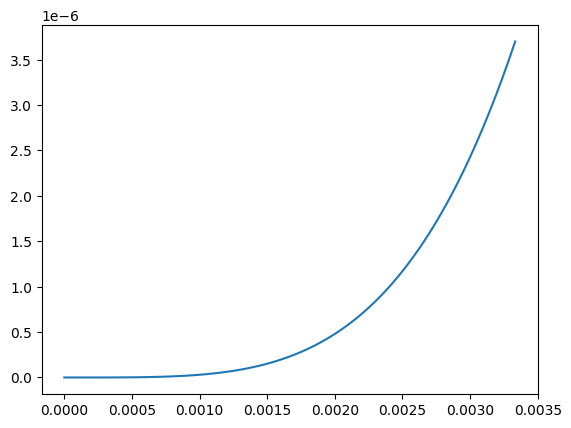

In [11]:
# sk1 vs crosstalk
def get_sk1_pulse(amp_ps,phase,t_ps=10e-6,sigmax=ssx,sigmay=ssy):
    ps = expm(-1j * ( 2 * np.pi * amp_ps * t_ps) * (np.cos(phase)*sigmax+np.sin(phase)*sigmay) / 2) 
    return ps

# cross = np.linspace(1/400,1/200,100)


infid = []
cross = np.linspace(0,1/300,100)
# cross = np.asarray([1/30])
for ind in range(100):
    
    sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(1,cross[ind])
    
    amp_ps = cross[ind] * 25e3 * np.ones(9)
    # print(amp_ps)
    phase = np.arccos(-1/8)
    # first pulse
    ps0 = get_sk1_pulse(amp_ps[0],0,sigmax=ssx,sigmay=ssy)
    # next four pulses
    ps1 = get_sk1_pulse(amp_ps[1],phase,sigmax=ssx,sigmay=ssy)
    ps2 = get_sk1_pulse(amp_ps[2],phase,sigmax=ssx,sigmay=ssy)
    ps3 = get_sk1_pulse(amp_ps[3],phase,sigmax=ssx,sigmay=ssy)
    ps4 = get_sk1_pulse(amp_ps[4],phase,sigmax=ssx,sigmay=ssy)
    # next four pulses
    ps5 = get_sk1_pulse(amp_ps[5],-phase,sigmax=ssx,sigmay=ssy)
    ps6 = get_sk1_pulse(amp_ps[6],-phase,sigmax=ssx,sigmay=ssy)
    ps7 = get_sk1_pulse(amp_ps[7],-phase,sigmax=ssx,sigmay=ssy)
    ps8 = get_sk1_pulse(amp_ps[8],-phase,sigmax=ssx,sigmay=ssy)

    sk1 = utils.prod(ps8,ps7,ps6,ps5,ps4,ps3,ps2,ps1,ps0)
    # print(abs(np.trace(np.matmul(utils.dagger(utarg),sk1))) / 2**nions)
    infid.append((1-abs(np.trace(np.matmul(utils.dagger(np.eye(2)),sk1))) / 2**nions)*1e4)

plt.plot(cross,infid)
# infid

In [ ]:
# knill vs crosstalk
def get_sk1_pulse(amp_ps,phase,t_ps=10e-6,sigmax=ssx,sigmay=ssy):
    ps = expm(-1j * ( 2 * np.pi * amp_ps * t_ps) * (np.cos(phase)*sigmax+np.sin(phase)*sigmay) / 2) 
    return ps

# cross = np.linspace(1/400,1/200,100)


infid = []
cross = np.linspace(0,1/300,100)
# cross = np.asarray([1/30])
for ind in range(100):
    
    sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(1,cross[ind])
    
    amp_ps = cross[ind] * 25e3
    ps0 = get_sk1_pulse(amp_ps,np.pi/6,t_ps=20e-6,sigmax=ssx,sigmay=ssy)
    ps1 = get_sk1_pulse(amp_ps,0,t_ps=20e-6,sigmax=ssx,sigmay=ssy)
    ps2 = get_sk1_pulse(amp_ps,np.pi/2,t_ps=20e-6,sigmax=ssx,sigmay=ssy)

    sk1 = utils.prod(ps0,ps1,ps2,ps1,ps0)
    # print(abs(np.trace(np.matmul(utils.dagger(utarg),sk1))) / 2**nions)
    infid.append((1-abs(np.trace(np.matmul(utils.dagger(np.eye(2)),sk1))) / 2**nions)*1e4)

plt.plot(cross,infid)